In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
import seaborn

In [2]:
train_pd = pd.read_csv('./iris/iris_train.data',names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "label"])
test_pd = pd.read_csv('./iris/iris_test.data', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "label"])

In [3]:
train_data = train_pd.as_matrix()
test_data = test_pd.as_matrix()

In [4]:
#Encoding the classes
le = preprocessing.LabelEncoder()
le.fit(train_data[:,-1])
print(le.classes_)
train_data[:,-1] = le.transform(train_data[:,-1])
test_data[:,-1] = le.transform(test_data[:,-1])
# y_train = le.transform(Y_train)
# y_test = le.transform(Y_test)

['Iris-setosa' 'Iris-versicolor']


In [5]:
train_pd.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


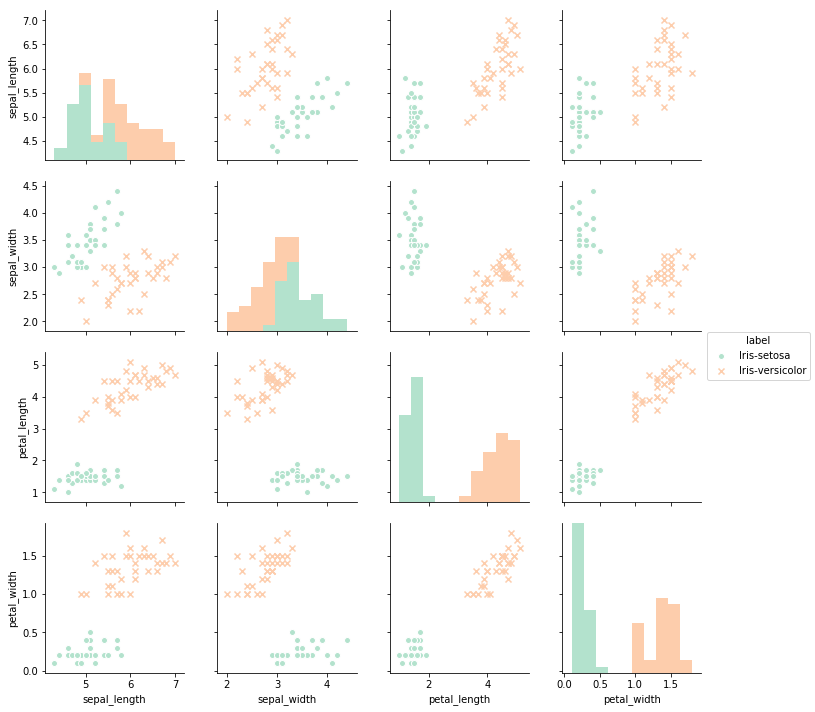

In [6]:
# Visualizing sepal_length and sepal_width

seaborn.pairplot(train_pd,  hue= 'label', palette= 'Pastel2', markers = ['o','x'])

##### Implementing the perceptron algorithm

In [7]:
class Perceptron():
    
    def train_network(self,data,w,b,num_epochs = 100000, lr = 1):
        for epoch in range(num_epochs):
#             np.random.shuffle(data)
            correct_count = 0
            for point in data:
                x,y = point[:-1], point[-1]
                preds = w.T.dot(x.reshape(-1,1)) + b
                y_pred = 1 if preds >= 0 else 0
                if y == y_pred:
                    correct_count += 1
                else:
                    w = w + lr * (y - y_pred)*(x.reshape(-1,1))
                    b = b + lr * (y - y_pred)
            if correct_count == len(data):
                return w,b,epoch+1
    
    def test_network(self,data,weights,bias,lr):
        predictions = []
        for x in data:
            preds = weights.T.dot(x.reshape(-1,1) + bias)
            y_pred = 1 if preds >= 0 else 0
            predictions.append(y_pred)
        return predictions
    
    def get_precision(self,preds,labels):
        True_Pos = len([preds[i] for i in range(len(preds)) if preds[i] == labels[i] and preds[i] == 1])
        Test_Positive = len([x for x in preds if x == 1])
        return True_Pos/Test_Positive
    
    def get_recall(self,preds,labels):
        True_Pos = len([preds[i] for i in range(len(preds)) if preds[i] == labels[i] and preds[i] == 1])
        Condition_Pos = True_Pos + len([preds[i] for i in range(len(preds)) if preds[i]== 0 and labels[i]==1])
        return True_Pos/Condition_Pos
    
    
    def calculate_metrics(self,preds,labels,data_type):
        accuracy = sum((preds == labels).astype(int))/len(labels)*100
        print(f'Accuracy on the {data_type} is {accuracy:.2f}%')
        precision = self.get_precision(preds,labels)
        print(f'Precision is {precision}')
        recall = self.get_recall(preds,labels)
        print(f'Recall is {recall}')
        F_val = 2*precision*recall/(precision+recall)
        print(f'F-value is {F_val}')
    

In [8]:
# Initializing the parameters
w = np.random.normal(0,1,(train_data.shape[1]-1,1))
b = np.random.normal(0,1)

In [9]:
print(f'Inital weight matrix: {w}')
print(f'Initial bias: {b}')

Inital weight matrix: [[-0.27156894]
 [ 0.59447851]
 [ 1.42403124]
 [ 1.20156965]]
Initial bias: 1.283042611343927


In [10]:
model = Perceptron()

In [11]:
weights, bias, ep = model.train_network(train_data,w,b)

In [12]:
print(f'The model converges in {ep} epochs')

The model converges in 4 epochs


In [14]:
train_preds = model.test_network(train_data[:,:-1], weights,bias,lr = 1)
model.calculate_metrics(train_preds,train_data[:,-1],'train data')

Accuracy on the train data is 100.00%
Precision is 1.0
Recall is 1.0
F-value is 1.0


In [15]:
preds = model.test_network(test_data[:,:-1], weights,bias,lr = 1)

In [16]:
model.calculate_metrics(preds,test_data[:,-1], 'test_data')

Accuracy on the test_data is 100.00%
Precision is 1.0
Recall is 1.0
F-value is 1.0


The data is linearly separable as we can see from the graphs. Trained the classifier from scrach multiple times, and everytime the classifier finds a decision boundary that separates the data points and stops immediately. Some decision boundaries turn out to be better than other decision boundaries and hence we get different results on the test set each time. The best result obtained is 100% accuracy on the test set and onvergence on train set in 4% epoch

In [17]:
print('The decision boundary is:')
print(f'Y = {bias:.2f} + {weights[0][0]:.2f}*sepal_length + {weights[1][0]:.2f}*sepal_width + {weights[2][0]:.2f}*petal_length + {weights[3][0]:.2f}*petal_width')

The decision boundary is:
Y = 0.28 + -1.57*sepal_length + -3.51*sepal_width + 6.62*petal_length + 3.40*petal_width


##### Running it once more

In [19]:
# Initializing the parameters
w2 = np.random.normal(0,1,(train_data.shape[1]-1,1))
b2 = np.random.normal(0,1)
model2 = Perceptron()
weights2, bias2, ep2 = model2.train_network(train_data,w2,b2)
print(f'The model converges in {ep2} epochs')
train_preds2 = model2.test_network(train_data[:,:-1], weights2,bias2,lr = 1)
model2.calculate_metrics(train_preds2,train_data[:,-1],'train data')
preds2 = model2.test_network(test_data[:,:-1], weights2,bias2,lr = 1)
print('-'*117)
model2.calculate_metrics(preds2,test_data[:,-1],'test data')
print('The decision boundary is:')
print(f'Y = {bias2:.2f} + {weights2[0][0]:.2f}*sepal_length + {weights2[1][0]:.2f}*sepal_width + {weights2[2][0]:.2f}*petal_length + {weights2[3][0]:.2f}*petal_width')


The model converges in 4 epochs
Accuracy on the train data is 100.00%
Precision is 1.0
Recall is 1.0
F-value is 1.0
---------------------------------------------------------------------------------------------------------------------
Accuracy on the test data is 96.67%
Precision is 1.0
Recall is 0.9333333333333333
F-value is 0.9655172413793104
The decision boundary is:
Y = -2.07 + -0.86*sepal_length + -2.78*sepal_width + 6.50*petal_length + 2.50*petal_width


We see here that it gets about 97% accuracy on the test set. This is because it finds a classifier that perfectly classifies on train set so it doesn't tryp to improve it further.